<a href="https://colab.research.google.com/github/pranshu-raj-211/project-alphazero/blob/main/GANv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reading for this exercise

1. Strides
2. Batch normalization, covariate shift
3. How convnets work, (understand well)
4. DropBlock
5. Pooling
6. Sampling
7.
8. [Best practices](https://arxiv.org/abs/1511.06434)


### Issues with my implementations

1. I don't have a standard way of doing things, this makes experiments messy and removes any possibility of coherent thought. -> Use some experiment tracker (Mlflow) or version control to handle this, make a list of some experiments to perform beforehand, then keep adding on the fly.
2. No thought behind the layers, I'm not thinking about my requirements. -> Understand everything really well before trying to build something out of it.

In [3]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (
    test_images,
    test_labels,
) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# labels will be changed from the classifier, labels are now 0(fake) and 1(real)

In [6]:
# Discriminator
from keras import layers

# I'm reusing parts of the classifier I built to distinguish between image labels
# One difference is that the output in this discriminator will be a scalar

# should I flatten the image before passing to the discriminator

# A leaky relu would be a good idea, also dropout and dropblock need to be tested
# Strides instead of pooling? Why would/wouldn't that work?
# Use separate activation layers when trying leaky relu

inputs = keras.Input(shape = (28,28,1))
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu',) (inputs)
x = layers.MaxPooling2D(pool_size = 2) (x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu',) (x)
x = layers.MaxPooling2D(pool_size = 2) (x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu',) (x)
x = layers.Flatten() (x)
outputs = layers.Dense(1, activation = 'sigmoid') (x)

discriminator = keras.Model(inputs = inputs, outputs = outputs)

# Convolution looks kinda overkill for this, but I'm thinking of using it if I'll add dropblock (will it work without conv?)
# Need a better idea of convnets mathematically, how they transform outputs (calc by hand)

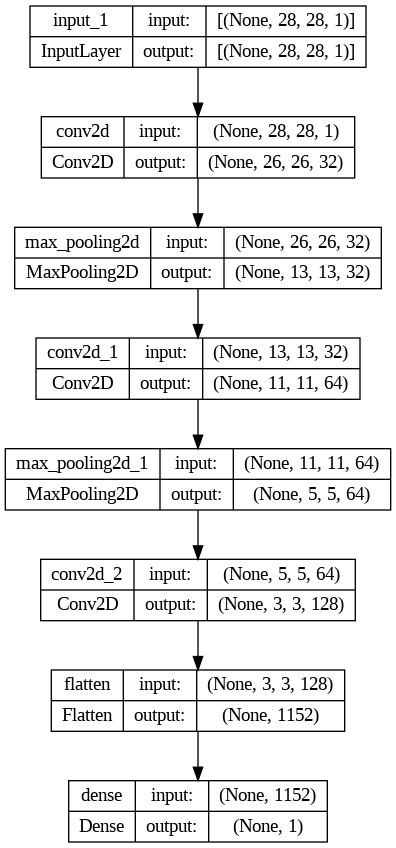

In [8]:
keras.utils.plot_model(discriminator,'basic_discriminator.png',show_shapes=True)

In [9]:
discriminator.summary()
# yeah, the params look really overkill, maybe go for a simpler model next time

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [ ]:
# building a template for model subclassing approach

class GAN(keras.models.Model):
    def __init__(self,n_rows=28,n_cols=28,n_channels=1):
        self.rows=n_rows
        self.columns=n_cols
        self.channels=n_channels

        self.discriminator=self.build_discriminator()
        self.generator=self.build_generator()

    def build_discriminator(self):
        pass

    def build_generator(self):
        pass